<a href="https://colab.research.google.com/github/DataScienceAndEngineering/deep-learning-final-project-project-sidewalk/blob/rabiul/notebooks%20/Rabiul/Baseline_Obs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruction

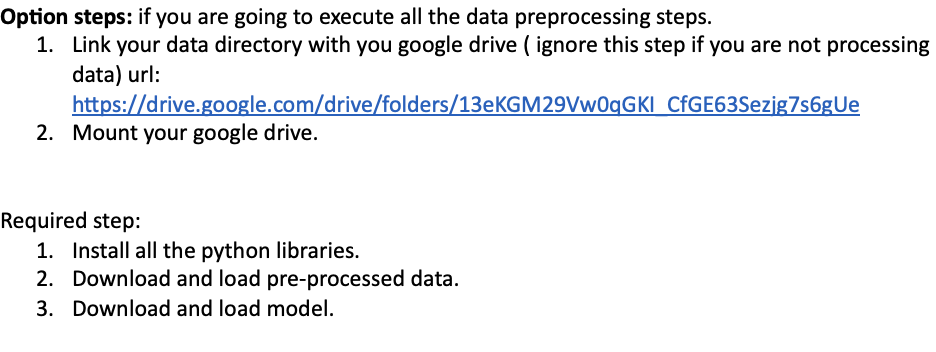![image.png]()


## Mount google Drive 

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Libraries

In [9]:
import os,sys
ROOT_DIR = '/content/drive/MyDrive/cityscapes/models/maskrcnn'
sys.path.append(ROOT_DIR)
from mrcnn import config, utils, visualize
import helper 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import transform
import cv2
from collections import namedtuple
import os, shutil,sys
import pandas as pd
import numpy as np 
from skimage.draw import polygon
import json
from skimage import transform
from sklearn.metrics import jaccard_score
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

#  Data and Model

## Option 




---
Only if your executing data preprocessing step.



In [6]:
#setting up all the data directory. 
IMG_DIR = '/content/drive/MyDrive/cityscapes/data/images'
MASK_DIR = '/content/drive/MyDrive/cityscapes/data/segmentations'
LABEL_DIR = '/content/drive/MyDrive/cityscapes/data/labels_obs.csv'

In [7]:
# read all the labels and convert them to dictionary
#{img_name: [(class_ids), (obstacle_ids)]}
labels = pd.read_csv(LABEL_DIR, index_col=None)
labels = labels.set_index('ID').T.to_dict('list')

## Load Data

In [80]:
df = pd.read_csv('/content/drive/MyDrive/DeepLearning/data/train_obs_150.csv')
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,19992,19993,19994,19995,19996,19997,19998,19999,label,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21


## Load Model from Google Drive 

In [81]:
!gdown --id 1SpojHpcqsbpEERF8KaCuvSLL92FbrxXy -O rf_object_classification.sav
!gdown --id 1-3BUOT4C7p1JUTrmUTkJ9ErRjhkz21pS -O obstruction_classification.sav

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SpojHpcqsbpEERF8KaCuvSLL92FbrxXy
To: /content/drive/MyDrive/DeepLearning/model/rf_object_classification.sav
100% 9.32M/9.32M [00:00<00:00, 188MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-3BUOT4C7p1JUTrmUTkJ9ErRjhkz21pS
To: /content/drive/MyDrive/DeepLearning/model/obstruction_classification.sav
100% 2.76M/2.76M [00:00<00:00, 102MB/s]


In [82]:
obj_classification = pickle.load(open('/content/drive/MyDrive/DeepLearning/model/rf_object_classification.sav', 'rb'))

In [83]:
obstruction_classification = pickle.load(open('/content/drive/MyDrive/DeepLearning/model/obstruction_classification.sav', 'rb'))

 Model evaluation: Object Classification

In [97]:
X = df.drop(labels = ["label",'class'], axis=1) 
Y = df["class"].values
print(X.shape, Y.shape)

(1540, 20000) (1540,)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1078, 20000) (462, 20000) (1078,) (462,)


In [107]:
y_pred = obj_classification.predict(X_test)

In [87]:
print ("Testing Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy =  0.7640692640692641


In [89]:
print ("Training Accuracy = ", metrics.accuracy_score(y_train, obj_classification.predict(X_train)))

Training Accuracy =  0.948051948051948


In [ ]:
Confusion_matrix(y_test, y_pred)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-108-7c7efea2d872>", line 1, in <cell line: 1>
    Confusion_matrix(y_test, y_pred)
  File "<ipython-input-105-6a7c2d54aa85>", line 22, in Confusion_matrix
    matrix[actual_class][pred_class] += 1
KeyError: 26

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, numb

### Model evaluation: Obstruction Classification

In [90]:
X = df.drop(labels = ["label",'class'], axis=1) 
Y = df["label"].values
print(X.shape, Y.shape)

(1540, 20000) (1540,)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1078, 20000) (462, 20000) (1078,) (462,)


In [92]:
y_pred = obstruction_classification.predict(X_test)

In [93]:
print ("Testing Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy =  0.7705627705627706


# Model Creation - Obstruction Classification

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [67]:
X = df.drop(labels = ["label",'class'], axis=1) 
Y = df["class"].values
print(X.shape, Y.shape)

(1540, 20000) (1540,)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1078, 20000) (462, 20000) (1078,) (462,)


In [59]:
model = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=10, 
                            min_samples_split=2, min_samples_leaf=1,bootstrap=True)

In [60]:
model.fit(X_train, y_train)
#/content/drive/MyDrive/DeepLearning/model

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)

In [61]:
filename = "rf_obs3.sav"
pickle.dump(model, open(filename, 'wb'))

In [62]:
y_pred = model.predict(X_test)

In [63]:
print ("Testing Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy =  0.7705627705627706


#Model Creation - Object classification

In [ ]:
X = train_final.drop(labels = ["label",'class'], axis=1) 
Y = train_final["class"].values
print(X.shape, Y.shape)

(700, 20000) (700,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(630, 20000) (70, 20000) (630,) (70,)


In [ ]:
model = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=10, 
                            min_samples_split=2, min_samples_leaf=1,bootstrap=True)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)

In [ ]:
filename = "rf_obs1.sav"
pickle.dump(model, open(filename, 'wb'))

# GridSearch CV

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score, GridSearchCV, RandomizedSearchCV

In [ ]:
grid_cv = {'n_estimators': [100, 200, 300],
           'min_samples_split': [2, 4],
           'min_samples_leaf': [1, 2],
           'max_depth': [10, 20],
           'bootstrap': [True, False]
           }

print(grid_cv)

{'n_estimators': [100, 200, 300], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2], 'max_depth': [10, 20], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_grid_cv = GridSearchCV(estimator = rf, param_grid = grid_cv,
                          cv = 5, verbose=2,n_jobs = 8,scoring= 'accuracy')

In [ ]:
%time rf_grid_cv.fit(X_train, y_train)
print(rf_grid_cv.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 6.81 s, sys: 925 ms, total: 7.74 s
Wall time: 7min 48s
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


CPU times: user 6.81 s, sys: 925 ms, total: 7.74 s
Wall time: 7min 48s
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

## ROCAUC

In [72]:
from yellowbrick.classifier import ROCAUC

In [ ]:
rf1 = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=10, 
                            min_samples_split=2, min_samples_leaf=1,bootstrap=True)

In [ ]:
visualizer = ROCAUC(rf1, classes=['Accessible','Not Accessible'])

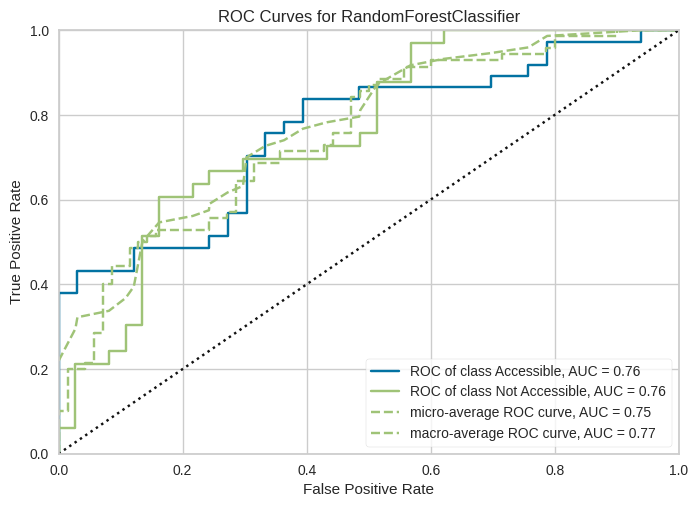

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [76]:
rf2 = RandomForestClassifier(n_estimators=300, criterion='entropy', max_depth=10, 
                            min_samples_split=2, min_samples_leaf=1,bootstrap=True)
visualizer = ROCAUC(rf2)#, classes=[ 'sidewalk', 'wall', 'fence', 'pole', 'vegetation', 'car', 'bicycle'])

In [ ]:
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [79]:
#[ 'sidewalk', 'wall', 'fence', 'pole', 'vegetation', 'car', 'bicycle']

# Functions

In [99]:
def get_bboxes(id, labels):
  img_path = f'/content/drive/MyDrive/cityscapes/data/images/{id}.png'  
  mask_path = f'/content/drive/MyDrive/cityscapes/data/segmentations/{id}.json'

  class_labels, obstruction_labels = labels[0], labels[1]
  class_labels, obstruction_labels =  np.array([int(i) for i in class_labels.split(' ')[:-1]]), np.array([int(i) for i in obstruction_labels.split(' ')[:-1]])

  # create mask using `helper.createmask`
  # output: [H,W, num of labels]
  masks = helper.create_mask(mask_path,class_labels, resize= (256,512))
  # generate bounding box `utils.extractbboxes`
  # bboxes are shape [num of labels, (y1,x1,y2,x2)]
  bboxes = utils.extract_bboxes(masks)
  return masks, bboxes,obstruction_labels,class_labels



def get_crop(img, crop):
  # crop can be achieved with bbox[n]
  # check image size against masks size make sure its reized to (256,512) !
  y1,x1,y2,x2 = crop
  return img[y1:y2,x1:x2]

In [100]:
def pad_image(image, target_shape):
    """
    Pads an image to a specified shape.

    Args:
    - image: Input image as a numpy array.
    - target_shape: Target shape as a tuple (height, width, channels).

    Returns:
    - Padded image as a numpy array.
    """

    # Get the current shape of the image
    height, width= image.shape

    # Calculate the amount of padding needed
    pad_height = max(target_shape[0] - height, 0)
    pad_width = max(target_shape[1] - width, 0)

    # Pad the image symmetrically on all sides
    top = pad_height // 2
    bottom = pad_height - top
    left = pad_width // 2
    right = pad_width - left

    padded_image = np.pad(image, ((top, bottom), (left, right)), mode='constant')

    return padded_image

In [101]:
def generate_data_df(labels, n):
  '''provide label dic that will contine, image id, label of obstruction and label of each class
  n=number of whole image your processing'''
  train = pd.DataFrame()
  for i, v in enumerate(labels.items()):
    x,y = v #x = image id, y = image classes and obstruction classes labels 
    #generating image mask, bounding box, and obstruction labels
    img_path = f'/content/drive/MyDrive/cityscapes/data/images/{x}.png'  #image path
    masks,bboxes,obstruction_labels, obj_class = get_bboxes(x,y) #function returns mask, bounding box and obstruction labels 
    img = cv2.imread(img_path, 0)
    img = transform.resize(img,(256,512))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for x in range(len(bboxes)):
      if 0 in bboxes[x]:
        continue
      y1,x1,y2,x2 = bboxes[x]
      m = img[y1:y2,x1:x2]

      m =pad_image(m, (100,200))
      if m.reshape(-1).shape[0] > 20000:
        continue
      #print(m.shape, m.reshape(-1).shape)
      df2 = pd.DataFrame([m.reshape(-1)])
      df2['label'] = obstruction_labels[x]
      df2['class'] = obj_class[x]
      train =pd.concat([train, df2])
    if i==n:
      break
  return train

In [102]:
def generate_cm(cm, lab):
  sns.heatmap(cm,
              annot=True,
              fmt='g',
              xticklabels=lab,
              yticklabels=lab)
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title('Confusion Matrix',fontsize=17)
  plt.show()

In [103]:
def plot_cm_new(cm,testscore):
  '''provide cm item and test score'''
  sns.heatmap(cm,
              annot=True,
              fmt='g',
              xticklabels=['Dog','Not Dog'],
              yticklabels=['Dog','Not Dog'])
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title('Confusion Matrix',fontsize=17)
  plt.show()

In [104]:
def plot_cm(cm,testscore):
  '''provide cm item and test score'''
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens',
            xticklabels=[i for i in emotions.values()],
            yticklabels=[i for i in emotions.values()],
            square=True,
            cbar=False)
  plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (testscore*100.0)), size=24)
  plt.tight_layout()
  plt.xticks(size=14)
  plt.yticks(size=14)
  plt.ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.show()

In [105]:
def Confusion_matrix(y_test, y_pred, target_names=None):
    
    # target_names is a list.
    # actual values are arranged in the rows.
    # predicted values are arranged in the columns.
    # if there are m classes, then cm is m*m matrix.
    if target_names == None:
        m = len(set(y_test))
    else:
        m = len(target_names)
    size = len(y_test)
    matrix = dict()
  
    # create matrix initialised with 0
    for class_name in range(m):
        matrix[class_name] = [0 for k in range(m)]
  
    # populating the matrix.
    for i in range(size):
        actual_class = y_test[i]
        pred_class = y_pred[i]
        matrix[actual_class][pred_class] += 1
  
    # Change the name of columns.
    if target_names == None:
        # Now, lets print the confusion matrix.
        print("Confusion Matrix of given model is :")
        if m == 3:
            print("Count=%-14d %-15s %-15s %-15s" % (size, 
                                                     '0', '1',
                                                     '2'))
            for key, value in matrix.items():
                print("Actual %-13s %-15d %-15d %-15d" %
                      (key, value[0], value[1], value[2]))
        elif m == 2:
            print("Count=%-14d %-15s %-15s" % (size, '0', '1'))
            for key, value in matrix.items():
                print("Actual %-13s %-15d %-15d" % (key, value[0], 
                                                    value[1]))
    else:
        matrix = dict(zip(target_names, list(matrix.values())))
  
        # Now, lets print the confusion matrix.
        print("Confusion Matrix of given model is :")
        print("Count=%-14d %-10s %-10s %-10s %-10s %-10s %-10s %-10s" %
              (size, target_names[0], target_names[1], target_names[2],target_names[3],target_names[4],target_names[5],target_names[6]))
        for key, value in matrix.items():
            print("Actual %-14s %-10d %-10d %-10d %-10d %-10d %-10d %-10d" %
                  (key, value[0], value[1], value[2], value[3], value[4], value[5], value[6]))
  
    return matrix
  

In [106]:
def performance_report(cm, model, dataType):
    col = len(cm)
      
    # col=number of class
    arr = []
    for key, value in cm.items():
        arr.append(value)
  
    cr = dict()
    support_sum = 0
      
    # macro avg of support is
    # sum of support only, not the mean.
    macro = [0]*3  
      
    # weighted avg of support is
    # sum of support only, not the mean.
    weighted = [0]*3
    for i in range(col):
        vertical_sum= sum([arr[j][i] for j in range(col)])
        horizontal_sum= sum(arr[i])
        p = arr[i][i] / vertical_sum
        r = arr[i][i] / horizontal_sum
        f = (2 * p * r) / (p + r)
        s = horizontal_sum
        row=[p,r,f,s]
        support_sum+=s
        for j in range(3):
            macro[j]+=row[j]
            weighted[j]+=row[j]*s
        cr[list(cm.keys())[i]]=row
  
    # add Accuracy parameters.
    truepos=0
    total=0
    for i in range(col):
        truepos+=arr[i][i]
        total+=sum(arr[i])
  
    cr['Accuracy']=["", "", truepos/total, support_sum]
  
    # Add macro-weight and weighted_avg features.
    macro_avg=[Sum/col for Sum in macro]
    macro_avg.append(support_sum)
    cr['Macro_avg']=macro_avg
  
    weighted_avg=[Sum/support_sum for Sum in weighted]
    weighted_avg.append(support_sum)
    cr['Weighted_avg']=weighted_avg
  
    # print the classification_report
    print("       Classification Report for {} with {}".format(model, dataType))
    space,p,r,f,s="labels","Precision","Recall","F1-Score","Support"
    print("%13s %9s %9s %9s %9s\n"%(space,p,r,f,s))
    stop=0
    for key,value in cr.items():
        if stop<col:
            stop+=1
            print("%13s %9.2f %9.2f %9.2f %9d"%(key,value[0],
                                                value[1],
                                                value[2],
                                                value[3]))
        elif stop==col:
            stop+=1
            print("\n%13s %9s %9s %9.2f %9d"%(key,value[0],
                                              value[1],
                                              value[2],
                                              value[3]))
        else:
            print("%13s %9.2f %9.2f %9.2f %9d"%(key,
                                                value[0],
                                                value[1],
                                                value[2],
                                                value[3]))
 